In [3]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(256, 256, 3)


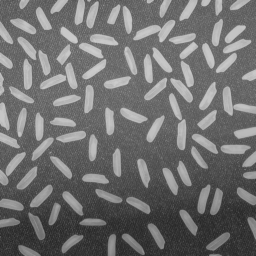

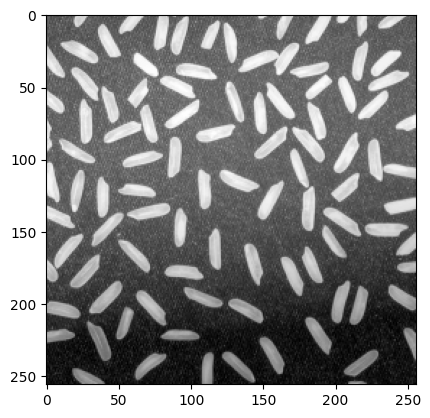

In [4]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/rice.bmp')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow (gImg, cmap= 'gray')
cv2_imshow(gImg)

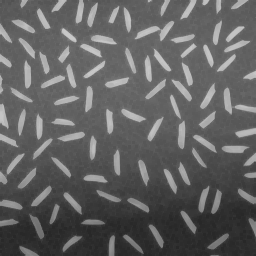

In [5]:
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(gImg, kernel, iterations = 1)
cv2_imshow(erosion)

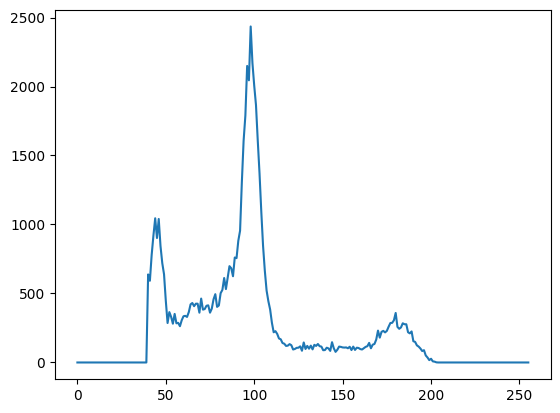

In [6]:
hist = cv2.calcHist([erosion],[0],None,[256],[0,256])
plt.plot(hist)

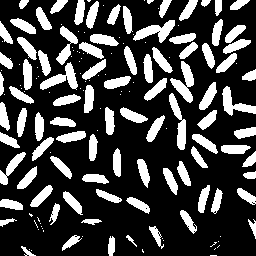

In [7]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]),dtype=np.uint8)

threshold = 130

for i in range(gImg.shape[0]):
  for j in range(gImg.shape[1]):
    if gImg[i,j] > threshold:
      gBin[i,j] = 255

cv2_imshow(gBin)

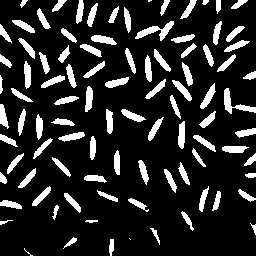

In [8]:
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(gBin, kernel, iterations = 1)
cv2_imshow(erosion)

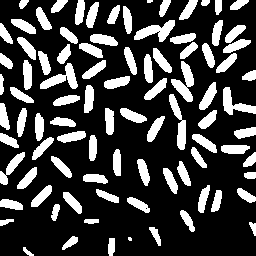

In [9]:
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(erosion, kernel, iterations = 1)
cv2_imshow(dilation)

In [10]:
num_labels, labels = cv2.connectedComponents(dilation, connectivity=8)
print(num_labels)

92


(480, 1622, 3)


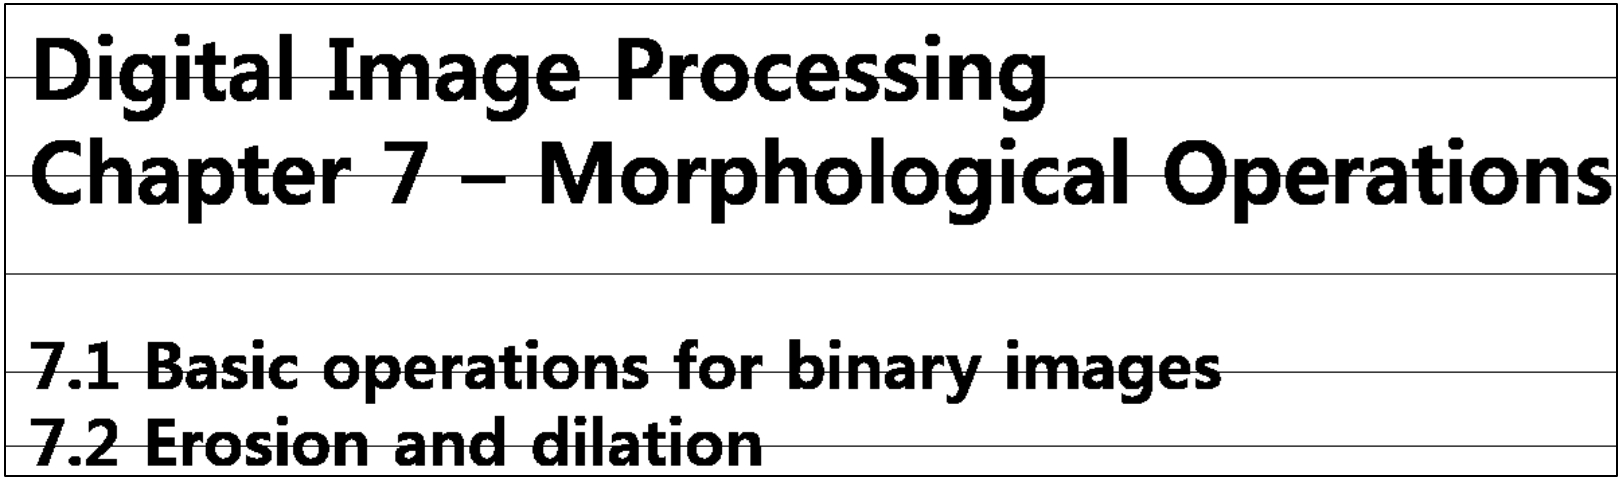

In [11]:
img = cv2.imread('/content/gdrive/My Drive/IP/Images/scanimg.jpg')
print(img.shape)
gImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.imshow (gImg, cmap= 'gray')
cv2_imshow(gImg)

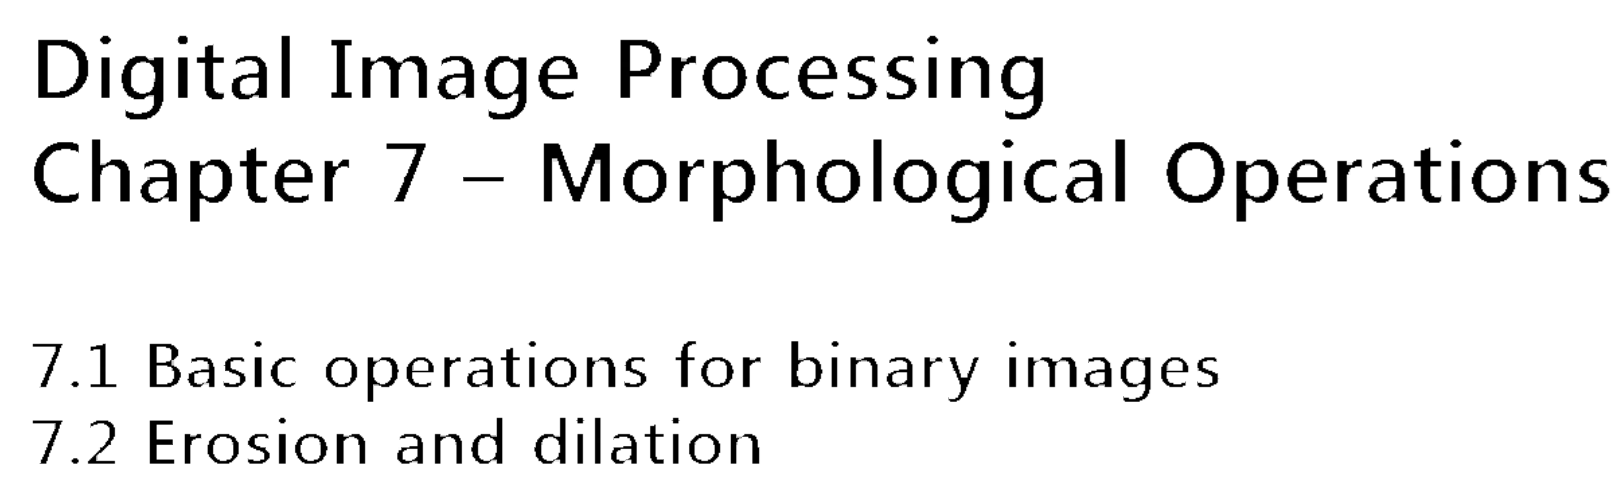

In [13]:
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(gImg, kernel, iterations = 2)
cv2_imshow(dilation)
#

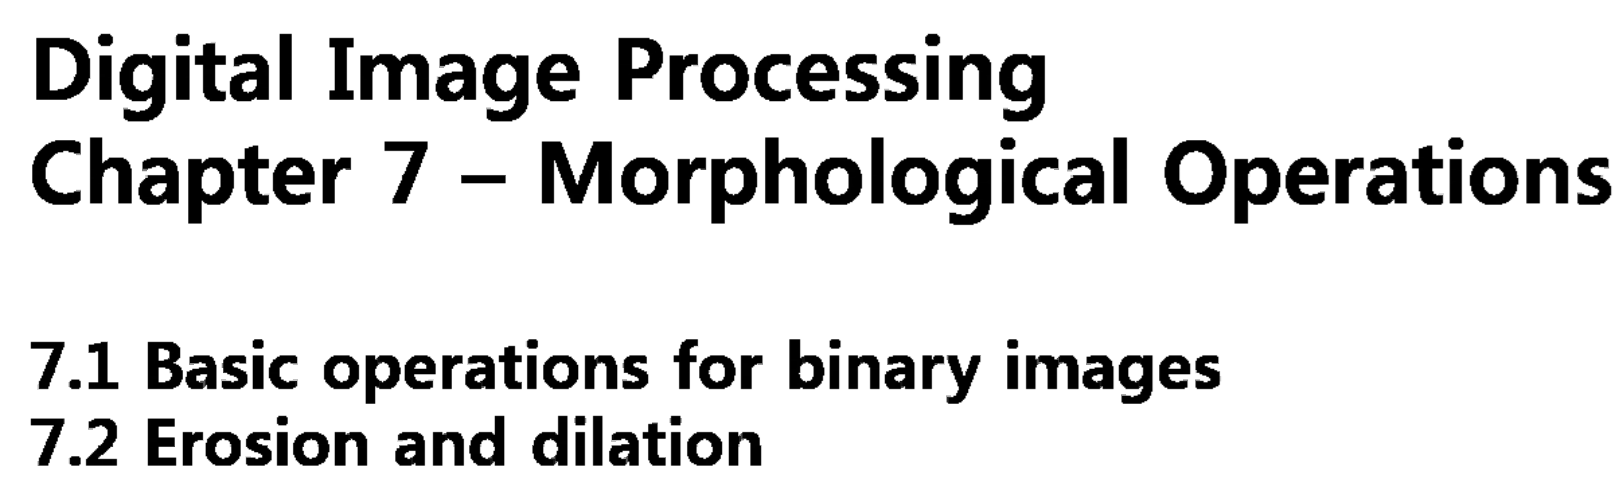

In [14]:
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(dilation, kernel, iterations = 2)
cv2_imshow(erosion)

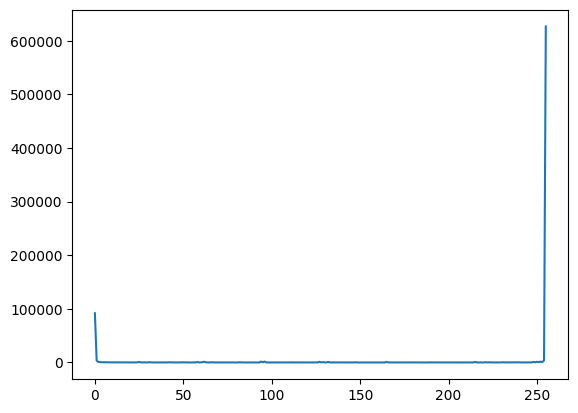

In [15]:
hist = cv2.calcHist([gImg],[0],None,[256],[0,256])
plt.plot(hist)


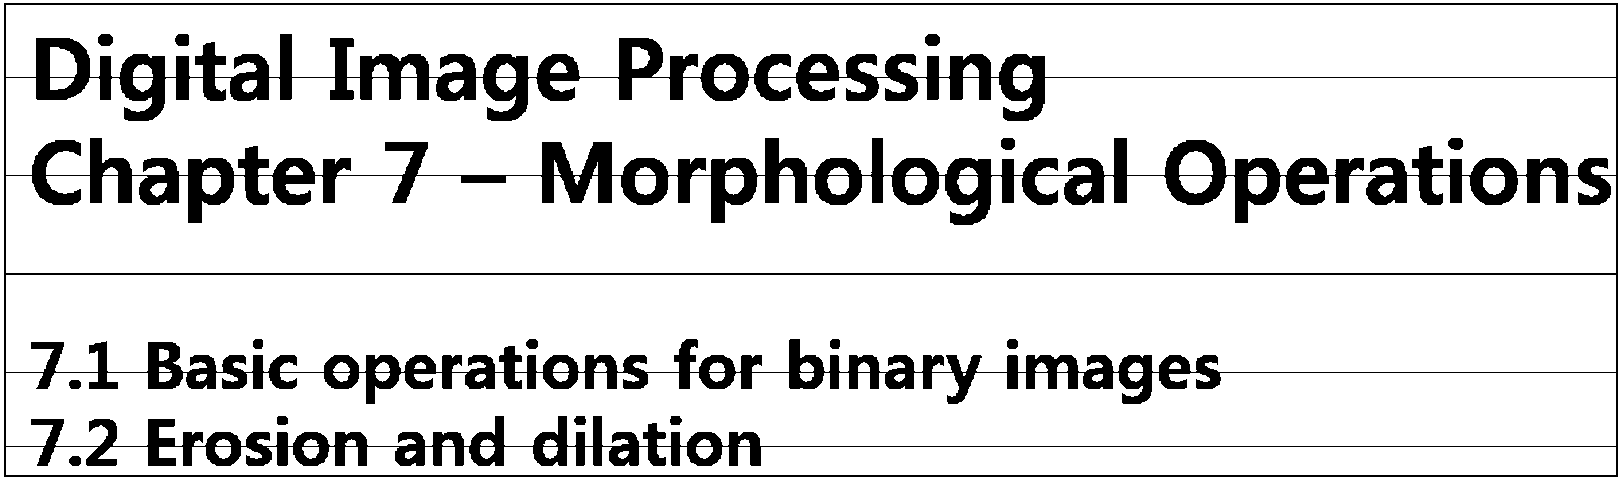

In [16]:
gBin = np.zeros((gImg.shape[0], gImg.shape[1]),dtype=np.uint8)

threshold = 110

for i in range(gImg.shape[0]):
  for j in range(gImg.shape[1]):
    if gImg[i,j] > threshold:
      gBin[i,j] = 255
cv2_imshow(gBin)

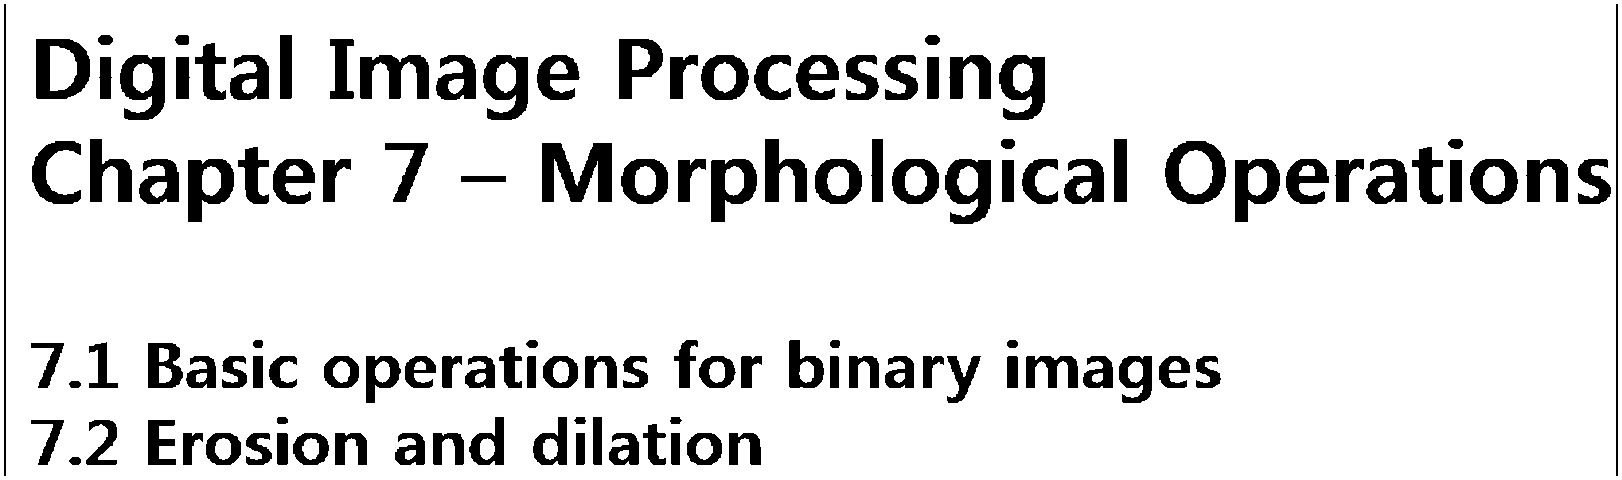

In [20]:
kernel = np.ones((3,1), np.uint8)
dilation = cv2.dilate(gBin, kernel, iterations = 1)
cv2_imshow(dilation)